<img src='https://analyticsindiamag.com/wp-content/uploads/2022/04/Screenshot-2022-04-06-at-9.55.11-PM.png' width=750>

*Images generated by a deep neural network that interprets text to generate images (DALL·E 2)*

# PC lab: intro to Neural networks & PyTorch

Deep learning is the subfield of machine learning that concerns neural networks with representation learning capabilities. As of recent years, it is arguably the most quickly growing field within machine learning, enjoying major breakthroughs every year (Listing a couple ones from last year(s): ChatGPT, AlphaFold v2, DALL·E 2, AlphaZero). Although the popularity of neural nets is a recent phenomenon, they were first described by Warren McCulloch and Walter Pitts in 1943. Early progress in training competitive neural networks was stalled by a multitude of reasons, such as the limited computer resources, sub-optimal network architectures and the use of smaller datasets. In this PC-lab we will introduce you to the basics of implementing a neural network using contemporary practices.

## 1 Background

### From linear models to neurons to neural networks

The core unit of every (artificial) neural network is considered the neuron. Every neuron can be observed as a linear combination of **one or more inputs** $\mathbf{a}$ with weights $\mathbf{w}$ (and optionally adding a **bias** $b$), outputting a **single output** $z$:

$z = \sum\limits_{i=1}^{n}(a_iw_i) + b$

equivalently written as dot product:

$z = \mathbf{a} \cdot \mathbf{w} + b$

When multiple neurons are placed next to eachother, we get multiple output neurons, this is called a **layer**. Mathematically, our weights and biases (intercepts) now become a matrix and vector respectively, and we obtain as output a vector $\mathbf{z}$:

$\mathbf{z} = \mathbf{a} \cdot \mathbf{W} + \mathbf{b}$

Multiple **layers** can be stacked sequentially to make up a deep neural network. Performing this gives us a big linear model, because multiple matrix multiplications performed consecutively can also be written as just one: (i.e. $\mathbf{x} \cdot \mathbf{W_1} \cdot \mathbf{W_2} ...$ could also be written as just $\mathbf{x} \cdot \mathbf{W_{all}}$). To obtain the *deep learning magic*, we need to make the whole thing **non-linear**. We do this by adding **activation functions** after every (hidden) layer. The most classical activation is the sigmoid activation $\sigma()$, used also in logistic regression. Nowadays, we usually opt for a more simple activation function: the **ReLU** $\texttt{ReLU}(z) = max(0,z)$. This function has the favorable property that its derivative is very efficient to compute (1 when $z$ is positive, 0 when it is negative). It also acts as a switch: a neuron will have a "dead" ($0$) activation whenever $z$ is negative.

For the output layer of a neural network: our activation depends on the task at hand. For binary classification, we use sigmoid to constrain our output between 0 and 1. For multi-class, we use a softmax operation so the output of all neurons sums to 1. For regression, we simply do not use an activation (or a custom one depending on your data: if you already know that your outputs can't be negative but can take all positive numbers ($\mathbb{R}^+$), then maybe a ReLU activation in the output nodes makes sense)

In order to build more intuition for neural networks: consider the following figure where we "visually build up" a neural network starting from Linear regression with four input features (**a**), to Logistic regression (**b**), to an archetypical output neuron with ReLU activation (**c**). For multi-output settings, we visualize multi-output regression (**d**), multi-label classification (more than one class can be 1 in a sample) (**e**), and multi-class classification via softmax (**f**). Finally, a simple neural network with two hidden layers for binary classification (sigmoid output head) is shown under **g**.

<img src='https://raw.githubusercontent.com/BioML-UGent/MLLS/main/11_intro_nns/lr2nn.png'>

**This figure makes it crystal clear that the most simple neural network is just a bunch of linear regressions stacked on top of eachother with non-linearities inbetween.** More advanced neural network architectures exist that modify how we make information flow between inputs. In this example, everything is just connected to everything with linear weights. This type of neural network is what we call an **MLP** or a **multi layer perceptron**.

Depending on the type of output, different loss functions may be used:
<img src='https://raw.githubusercontent.com/BioML-UGent/MLLS/main/11_intro_nns/lossfunctions.png' width=800>

<!-- TEX CODE TO GENERATE THE ABOVE:
\begin{table}[]
\resizebox{1.00\linewidth}{!}{
\begin{tabular}{llll}
\toprule
\textbf{Loss}    & \textbf{Formula}     & \textbf{Purpose}        & \textbf{Domain} \\[1mm] \midrule
Squared loss & $\mathcal{C}(y,~f(\mathbf{x}))~=~(y-f(\mathbf{x}))^2$ & Regression & $f(\mathbf{x}) \in \mathbb{R}$ \\[2mm]
Logistic loss & $\mathcal{C}(y,~f(\mathbf{x}))~= -y\log(f(\mathbf{x}))-(1-y)\log(1-f(\mathbf{x}))$ & Binary clf & $f(\mathbf{x}) \in [0,1]$ \\[2mm]
Cross entropy & $\mathcal{C}(\mathbf{y},~\mathbf{f}(\mathbf{x}))~= - \sum_{j=1}^k y_j\log(f_j(\mathbf{x})) $ & \begin{tabular}[c]{@{}l@{}}Multi-class\\ classification\end{tabular} & $\mathbf{f}(\mathbf{x}) \in \Delta^k$ \\[3.5mm]
Multi-label logistic loss & $\mathcal{C}(\mathbf{y},~\mathbf{f}(\mathbf{x}))~= - \sum_{j=1}^k(-y_j\log(f_j(\mathbf{x}))-(1-y_j)\log(1-f_j(\mathbf{x}))) $ & \begin{tabular}[c]{@{}l@{}}Multi-label\\ classification\end{tabular} & $\mathbf{f}(\mathbf{x}) \in [0,1]^k$ \\[3.5mm]
Multi-output squared loss & $\mathcal{C}(\mathbf{y},~\mathbf{f}(\mathbf{x}))~= - \sum_{j=1}^k(y_j-f_j(\mathbf{x}))^2 $ & \begin{tabular}[c]{@{}l@{}}Multi-output\\ regression\end{tabular} & $\mathbf{f}(\mathbf{x}) \in \mathbb{R}^k$ \\[2mm]\bottomrule
\end{tabular}
}
\end{table}
-->


Keep in mind that all of the above methods usually fit a bias/intercept in addition to weights fitted on the input features.
For an MLP, visually it would look like this:

<img src='https://raw.githubusercontent.com/BioML-UGent/MLLS/main/11_intro_nns/biases.png'>

<div class="alert alert-success">

<b>THOUGHT EXERCISE:</b>
<p> How much weights does the model pictured above have (including biases)? </p>

</div>

Keep in mind that every layer consists of (1) a matrix multiplication of an input $\mathbf{A} \in \mathbb{R}^{N, D}$ with a set of weights $\mathbf{W} \in \mathbb{R}^{D, M}$ and (2) a non-linearity. With $D$ the number of input features/dimensions/nodes (including one node/feature for the intercept, see the following equation) and $M$ the number of output dimensions/nodes.
\begin{equation}
\mathbf{A}\mathbf{W} =
\begin{bmatrix}
1 & x_{1,1} & ...  & x_{1,D-1} & x_{1,D} \\
1 & x_{1,1} & ... & x_{1,D-1} & x_{1,D} \\
... & ... & ... & ... & ...\\
1 & x_{N-1,1} & ... & x_{N-1,D-1} & x_{N-1,D} \\
1 & x_{N,1} & ...  & x_{N,D-1} & x_{N,D} \\
\end{bmatrix}
\begin{bmatrix}
W_{1,1} & W_{1,1} & ...  & W_{1,M-1} & W_{1,M} \\
W_{1,1} & W_{1,1} & ... & W_{1,M-1} & W_{1,M} \\
... & ... & ... & ... & ...\\
W_{D-1,1} & W_{D-1,1} & ... & W_{D-1,M-1} & W_{D-1,M} \\
W_{D,1} & W_{D,1} & ...  & W_{D,M-1} & W_{D,M} \\
\end{bmatrix}
\end{equation}

Written answer:
The network goes from 4->3->2->1 neurons.

The first layer has (4+1)\*3 weights.
The next (3+1)\*2.
The last (2+1)\*1.
In total: 15+8+3=26

The whole network is trained by first performing a forward pass to get predictions and compute a loss w.r.t. ground truth known labels, then doing backpropagation (essentially applying the chain rule of derivatives) to obtain the gradient of all weights w.r.t. the loss. These gradients are then used by gradient descent (or more modern variants such as Adam) to optimize the neural network.

Training neural networks is (typically) more computationally demanding than more traditional machine learning methods, and we usually use neural networks when we have large datasets. For these two reasons, it is not a good idea to process the whole dataset at once in every training step/iteration. Therefore, to train the network, we process samples in batches, called **(mini-batch) stochastic gradient descent**. This allows for faster training and improved convergence of the loss during gradient descent. Advantages of stochastic gradient descent or other optimization algorithms for loss calculation are not discussed in this PC-lab, but have been [extensively discussed](https://ruder.io/optimizing-gradient-descent/) before.

### Dropout and Normalization layers

Dropout is a popular addition to neural networks. It is a form of regularization during which we stochastically deactivate a percentage of neurons in every training step by putting their activation to zero. This regularization only happens during training, as during testing we (usually) want deterministic outputs. Conceptually, it is similar to other regularization techniques such as ridge regression and subsampling of features in random forest training, in the sense that it will force our model to look at all features, because sometimes one single feature will not be available during training. The difference here is that we do it by stochastically putting nodes to zero during training, and that we can perform it not only on our input features, but also on our hidden nodes.

Mathematically, it can be performed by simply sampling a boolean vector and doing element-wise multiplication.

Visually, it would look a bit like this, where nodes in cyan are dropped out, and the associated cyan weights do not have any influence on training anymore (in that training step):

<img src='https://raw.githubusercontent.com/BioML-UGent/MLLS/main/11_intro_nns/dropout.png'>

## 2 PyTorch

To implement neural networks with more ease, a few high-level python libraries are available: (PyTorch, TensorFlow/keras, JAX, ...). These libraries provide functionality in terms of automatic differentiation (backprop), ready-to-use implementations for various layers, loss functions ...

In this lab, we will use [PyTorch](https://pytorch.org). PyTorch is the most popular library for deep learning in academia as of today. For this course it offers the advantage that it has the most 'pythonic' syntax, to the point where almost all NumPy functions have a PyTorch counterpart.

If you want to run this notebook locally, you can find the installation instructions for PyTorch [here](https://pytorch.org/get-started/locally/). Make sure to select the right installation options depending on your system (if you have a GPU or not).



In [1]:
import torch
import numpy as np

### Tensors

Tensors are the fundamental data structures in PyTorch. They are analogous to NumPy arrays. The difference is that tensors can also run on GPU hardware. GPU hardware is optimized for many small computations. Matrix multiplications, the building blocks of all deep learning, run orders-of-magnitude faster on GPU than on CPU. Let's see how tensors are constructed and what we can do with them:

In [ ]:
x = [[5,8],[9,8]]
print(torch.tensor(x))
print(np.array(x))

tensor([[5, 8],
        [9, 8]])
[[5 8]
 [9 8]]


In [ ]:
x_numpy = np.array(x)
print(torch.from_numpy(x_numpy))

x_torch = torch.tensor(x)
print(x_torch.numpy())

tensor([[5, 8],
        [9, 8]])
[[5 8]
 [9 8]]


In [ ]:
print(np.random.randn(8).shape)
print(np.random.randn(8,50).shape)


print(torch.randn(8).shape) # an alternative for .shape in PyTorch is .size()
print(torch.randn(8,50).shape)

(8,)
(8, 50)
torch.Size([8])
torch.Size([8, 50])


In [ ]:
print(np.zeros((8,50)).shape)
print(torch.zeros(8,50).shape) # works with 'ones' as well

(8, 50)
torch.Size([8, 50])


In PyTorch, the standard data type for floats is `float32`, which is synonymous to `float` within its framework. `float64` is synonymous to `double`.
This is different from the NumPy defaults and naming conventions: NumPy default data type for float is `float64`. Keep this in mind when converting numpy arrays to tensors and back!

In [ ]:
print(np.zeros(8).dtype)
print(torch.zeros(8).dtype)

float64
torch.float32


Conversion of data types:

In [ ]:
x = torch.randn(8)
print(x.dtype)
x = x.to(torch.float64)
print(x.dtype)

torch.float32
torch.float64


`torch.long` is synonymous to `torch.int64`. The only difference between int32 and int64 is the amount of bytes with which you will store every integer. If you go up to very high numbers, you will get numerical overflow faster with more compressed data types. We recommend you to always use the defaults: `torch.long` and `torch.float`







In [ ]:
x = torch.randint(low=0, high=8, size=(8,), dtype=torch.int32)
print(x)
print(x.dtype)
x = x.to(torch.long)
print(x.dtype)

tensor([2, 1, 4, 5, 1, 0, 7, 4], dtype=torch.int32)
torch.int32
torch.int64


Indexing and other operations work as in NumPy arrays

In [ ]:
x = torch.randn(8,50,60)
print(x.shape)
print(x[:4,10:-10].shape)
x[0,0,:10] = 0
print(x[0,0,:16])

print(torch.min(x), torch.max(x), torch.min(torch.abs(x)))
# most of these functions are also tensor methods:
print(x.min(), x.max(), x.abs().min())

torch.Size([8, 50, 60])
torch.Size([4, 30, 60])
tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.8780,  0.3892, -3.1923, -0.8431, -0.9597,  0.8279])
tensor(-3.7373) tensor(4.0937) tensor(0.)
tensor(-3.7373) tensor(4.0937) tensor(0.)


Joining tensors via concatenation:

In [ ]:
print(x.shape)
x_cat0 = torch.cat([x, x], dim=0)
print(x_cat0.shape)
x_cat1 = torch.cat([x, x, x], dim=1)
print(x_cat1.shape)

torch.Size([8, 50, 60])
torch.Size([16, 50, 60])
torch.Size([8, 150, 60])


Matrix multiplication: let's say we have an input `x`, consisting of 8 samples with 26 features, that we linearly combine with weights `w` to get a single output for every sample:



In [ ]:
x = torch.randn(8,26)
w = torch.randn(26,1)

y_hat = torch.matmul(x, w) # an alternative and equivalent syntax is x @ w
print(y_hat)
print(y_hat.shape)

tensor([[ 7.2311],
        [ 2.7368],
        [-4.0313],
        [-6.1711],
        [ 6.3403],
        [11.7833],
        [-1.3083],
        [-7.9240]])
torch.Size([8, 1])


Note that matrix multiplication is different from element-wise multiplication. For element-wise, `*` is used.

In [ ]:
x = torch.ones(8)
print(x)
x = x - 1.5
print(x)
x -= 1.5
print(x)
x += torch.randn(1)
print(x)
x += torch.randn(8)
print(x)

tensor([1., 1., 1., 1., 1., 1., 1., 1.])
tensor([-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000])
tensor([-2., -2., -2., -2., -2., -2., -2., -2.])
tensor([-0.4432, -0.4432, -0.4432, -0.4432, -0.4432, -0.4432, -0.4432, -0.4432])
tensor([ 1.2481, -0.7387,  0.1744, -1.0867, -2.0273,  0.9972,  0.3921,  2.4844])


Broadcasting works as in NumPy: [link](https://pytorch.org/docs/stable/notes/broadcasting.html)

Keep in mind, just like in NumPy, whatever you want to do with a tensor, there's probably an elegant operation for it implemented somewhere, you just have to look for it (on google and in the documentation)

 ## 3 Building a neural network in PyTorch

### 3.1 The building blocks

Neural networks are initialized through the use of class objects. You have encountered class objects already during this course: sklearn models are all class objects. The difference here is that we will code our own class first, before using it.

Many of the functionalities necessary to create [**all types of neural networks**](http://www.asimovinstitute.org/neural-network-zoo/) have [**already been implemented**](http://pytorch.org/docs/master/nn.html).

Let's inspect the most basic building blocks first: the [linear layer](https://pytorch.org/docs/master/generated/torch.nn.Linear.html#torch.nn.Linear) and the [ReLU](https://pytorch.org/docs/master/generated/torch.nn.ReLU.html#torch.nn.ReLU)

A linear layer is an object that will perform a matrix multiplication once called. Here, we instantiate such a layer with 20 input nodes and 40 output nodes:

In [2]:
import torch.nn as nn
nn.Linear(20, 40)

Linear(in_features=20, out_features=40, bias=True)

Let's simulate some random data for this layer: A data set (or batch) with 16 samples and 20 features:

In [3]:
x = torch.randn(16, 20)

Now let's use our linear layer on this data:

In [4]:
layer = nn.Linear(20, 40)
print(x.shape)
z = layer(x)
print(z.shape)

torch.Size([16, 20])
torch.Size([16, 40])


What happens when we try to feed our layer an input with a different number of features?

In [5]:
x = torch.randn(16, 30)
layer(x)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (16x30 and 20x40)

Let's see the ReLU in action:

In [6]:
relu = nn.ReLU()

x = torch.randn(2, 4)
print(x)
z = relu(x)
print(z)

tensor([[-0.0156,  0.4451, -0.1876, -0.8484],
        [ 0.7048,  0.3062, -1.4224, -1.2392]])
tensor([[0.0000, 0.4451, 0.0000, 0.0000],
        [0.7048, 0.3062, 0.0000, 0.0000]])


As you may have noticed, `nn.Module`s are class objects, a bit like scikit-learn models, that you instantiate and then call.

You can chain `nn.Module`s with the use of `nn.Sequential`:

In [7]:
linear_and_relu = nn.Sequential(nn.Linear(20, 40), nn.ReLU())

x = torch.randn(16, 20)
z = linear_and_relu(x)

Or even longer constructs:

Always keep in mind what happens with the dimensions of your input and outputs with every layer, if your first layer outputs 40 features/nodes/hidden dimensions, then logically the next will have to take 40 as input.

In [8]:
a_whole_damn_network = nn.Sequential(
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 16),
    nn.ReLU(),
    nn.Linear(16, 4),
    nn.ReLU(),
    nn.Linear(4, 1)
    )

x = torch.randn(16, 128)
z = a_whole_damn_network(x)
print(z.shape)
print(z)

torch.Size([16, 1])
tensor([[-0.3447],
        [-0.3831],
        [-0.3521],
        [-0.3478],
        [-0.3590],
        [-0.2883],
        [-0.2646],
        [-0.3662],
        [-0.3572],
        [-0.3097],
        [-0.3318],
        [-0.2971],
        [-0.2919],
        [-0.3228],
        [-0.3570],
        [-0.3607]], grad_fn=<AddmmBackward0>)


The output $z$ that we now obtain after this whole network are called **logits**. They are the real-numbered $\mathbb{R}$ outputs that we obtain at the end of the network before our last activation function. This last activation function will be a, depending on the task at hand, sigmoid, softmax, or nothing at all for regression

Similar implementations exist for all types of layers in PyTorch (e.g. Dropout), we invite you to look them up.

### 3.2 Class object neural networks and hyperparameters

We've seen how to implement a neural network using PyTorch `nn.Sequential`. It is more flexible however to write our own model class. This allows us to have more control over which operations we use and define our own hyperparameters. To make a PyTorch model, we specify our class object to be a submodule of `nn.Module` and inherit its methods via `super().__init__()`. Further, we specify all necessary attributes (such as layers) in our `__init__` function (executed upon initialization) and implement a `forward` function which will be executed when we call the object after being initialized.

The following code shows two examples, the first one of a very basic construction of a neural network without hyperparameters. The other one shows the same network, but where we set up our `__init__` function to process hyperparameters as input arguments. We can for example specify a hyperparameter whether we want to use dropout or not. (We could go even further to have an extra hyperparameter specifying the probability of dropout, ...).

In [9]:
class BasicModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(50, 40)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)

        self.layer2 = nn.Linear(40, 20)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)

        self.layer3 = nn.Linear(20, 10)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.2)

        self.layer4 = nn.Linear(10, 5)
        # Think again: why do we not want a relu and dropout after our last layer again?

    def forward(self, x):
        # call them in separate lines:
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        # or together:
        x = self.dropout2(self.relu2(self.layer2(x)))
        x = self.dropout3(self.relu3(self.layer3(x)))

        # we could've also wrapped everything in a nn.Sequential ..

        x = self.layer4(x)
        return x

class HyperparameterModel(nn.Module):
    def __init__(self, dimensions_from_input_to_output = [50, 40, 20, 10, 5], dropout = True):
        super().__init__()

        layers = []
        # iterate through all layers:
        for i in range(len(dimensions_from_input_to_output) - 2):
            layer = nn.Linear(dimensions_from_input_to_output[i], dimensions_from_input_to_output[i + 1])
            layers.append(layer)
            layers.append(nn.ReLU())
            if dropout == True:
                layers.append(nn.Dropout(0.2))


        # the last layer separate from the loop because we don't want a ReLU and dropout after the last layer
        layer = nn.Linear(dimensions_from_input_to_output[i+1], dimensions_from_input_to_output[i + 2])
        layers.append(layer)

        # wrap the layers in a sequential
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)



Testing out the basic model:

In [10]:
net = BasicModel()
net

BasicModel(
  (layer1): Linear(in_features=50, out_features=40, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.2, inplace=False)
  (layer2): Linear(in_features=40, out_features=20, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.2, inplace=False)
  (layer3): Linear(in_features=20, out_features=10, bias=True)
  (relu3): ReLU()
  (dropout3): Dropout(p=0.2, inplace=False)
  (layer4): Linear(in_features=10, out_features=5, bias=True)
)

In [11]:
x = torch.randn(4, 50)
y = net(x)
print(y)
print(y.shape)


tensor([[ 0.0226,  0.0953,  0.1549,  0.0994,  0.1935],
        [-0.0162,  0.0987,  0.1986,  0.0790,  0.1347],
        [ 0.0035,  0.1678,  0.1622,  0.0546,  0.1667],
        [ 0.0156,  0.0540, -0.0017, -0.0243,  0.2485]],
       grad_fn=<AddmmBackward0>)
torch.Size([4, 5])


Testing out the hyperparameter model, when no arguments are specified the default ones are chosen:

In [12]:
net = HyperparameterModel()
net

HyperparameterModel(
  (net): Sequential(
    (0): Linear(in_features=50, out_features=40, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=40, out_features=20, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=20, out_features=10, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=10, out_features=5, bias=True)
  )
)

In [13]:
x = torch.randn(4, 50)
y = net(x)
print(y)
print(y.shape)

tensor([[-0.2654, -0.0322,  0.1680,  0.2114,  0.1424],
        [-0.2743,  0.0059,  0.2120,  0.2940,  0.2009],
        [-0.2228,  0.0582,  0.2126,  0.2455,  0.1954],
        [-0.3185, -0.0294,  0.1463,  0.2936,  0.0920]],
       grad_fn=<AddmmBackward0>)
torch.Size([4, 5])


Or by specifying hyperparameters, the following code shows a bit of a deeper model:

In [14]:
net = HyperparameterModel(dimensions_from_input_to_output = [50, 160, 80, 40, 20, 10, 5], dropout = False)
net

HyperparameterModel(
  (net): Sequential(
    (0): Linear(in_features=50, out_features=160, bias=True)
    (1): ReLU()
    (2): Linear(in_features=160, out_features=80, bias=True)
    (3): ReLU()
    (4): Linear(in_features=80, out_features=40, bias=True)
    (5): ReLU()
    (6): Linear(in_features=40, out_features=20, bias=True)
    (7): ReLU()
    (8): Linear(in_features=20, out_features=10, bias=True)
    (9): ReLU()
    (10): Linear(in_features=10, out_features=5, bias=True)
  )
)

In [15]:
x = torch.randn(4, 50)
y = net(x)
print(y)
print(y.shape)

tensor([[ 0.0767, -0.3733,  0.0826, -0.0188, -0.0161],
        [ 0.0751, -0.3810,  0.0857, -0.0136, -0.0184],
        [ 0.0732, -0.3741,  0.0861, -0.0189, -0.0131],
        [ 0.0771, -0.3699,  0.0843, -0.0219, -0.0186]],
       grad_fn=<AddmmBackward0>)
torch.Size([4, 5])


<div class="alert alert-success">

<b>EXERCISE:</b>
<p> Copy over any of the two networks above (preferably the one you understand best), and modify it to take as input 784 features and as output 10 nodes. We will use this network later in the PC lab. You can test your network for bugs using some randomly generated data (as above).</p>

</div>

In [16]:
######## YOUR CODE HERE #########
model = HyperparameterModel(dimensions_from_input_to_output = [784, 160, 80, 40, 20, 10], dropout = False)

x = torch.randn(4, 784)
model(x)

#################################

tensor([[-0.0161, -0.0520,  0.1217,  0.0693, -0.2141, -0.1420,  0.2419, -0.1478,
          0.0591,  0.0995],
        [-0.0272, -0.0322,  0.1049,  0.0920, -0.2031, -0.1350,  0.2106, -0.1483,
          0.0758,  0.1120],
        [-0.0157, -0.0357,  0.1347,  0.0906, -0.1918, -0.1523,  0.2206, -0.1521,
          0.0642,  0.0997],
        [-0.0161, -0.0396,  0.1285,  0.0743, -0.1951, -0.1417,  0.2319, -0.1472,
          0.0701,  0.0960]], grad_fn=<AddmmBackward0>)

### 3.3 Data and training

You may have noticed that the outputs of your model have a `grad_fn` attribute. This grad function will be used by PyTorch automatic differentation engine to perform backward passes and compute gradients for every parameter with respect to the loss/cost function.

Now that we have our model and know that PyTorch will automatically compute gradients for us, we can move on to train a model. To do this, we need a couple more things:

The most basic blueprint of PyTorch model training consists of
- Get your data
- Wrap your data splits in a [data loader](https://pytorch.org/docs/stable/data.html)
- Instantiate the model
- Instantiate a [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions)
- Instantiate an [optimizer object](https://pytorch.org/docs/stable/optim.html), to which you pass the parameters you want to optimize
- Iterate through your training data, for every batch:
    - reset the gradients
    - do forward pass
    - compute loss
    - backward pass
    - update parameters

(Optionally):
- After every full iteration through all training data samples (called an epoch), loop through all batches of validation data:
    - forward pass
    - compute loss and validation scores

In this way, we can monitor how good our model is performing on left-out validation data during training, this is used in early stopping. Notably, we do not compute and reset gradients and update parameters during our validation iterations, because we do not want to fit our model on this data.


Let's start with step one: get your data and wrap them in data loaders. We will first illustrate how we can convert our usual pandas or numpy datasets to be compatible with PyTorch with some random data:

In [17]:
X_train = np.random.randn(100, 784)
y_train = np.random.randint(low = 0, high = 10, size = (100))

In [18]:
X_train = torch.from_numpy(X_train)
print(X_train.dtype)

torch.float64


Remember to look at your data types: by default NumPy is `float64`, but if you instantiate a model, by default it will have weights in `float32`. It is therefore advised to convert your data to `float32`. In PyTorch, simply `float` is shorthand for `float32`.

In [19]:
X_train = X_train.float()
# Equivalent: X_train.to(torch.float) or X_train.to(torch.float32)
print(X_train.dtype)

torch.float32


In [20]:
y_train = torch.tensor(y_train)
print(y_train.dtype)

torch.int64


Now that we have our X_train and y_train as tensors, we can make them PyTorch-ready by wrapping them in a PyTorch dataset, and then by wrapping them in a DataLoader, which will create batches for us:

In [21]:
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=16, pin_memory=True, shuffle=True)

Now we can use our train_dataloader as such:

In [22]:
for batch in train_dataloader:
    X, y = batch
    print(X.shape, y.shape)

torch.Size([16, 784]) torch.Size([16])
torch.Size([16, 784]) torch.Size([16])
torch.Size([16, 784]) torch.Size([16])
torch.Size([16, 784]) torch.Size([16])
torch.Size([16, 784]) torch.Size([16])
torch.Size([16, 784]) torch.Size([16])
torch.Size([4, 784]) torch.Size([4])


As you can see, we can iterate through our batches by use of a for loop, and it will spit out a training batch consisting of a list of X and y tensors. We can also test out code by isolating one training batch like this (only necessary for testing out code):

In [ ]:
batch = next(iter(train_dataloader))
batch

[tensor([[-0.4215, -0.8713, -0.5904,  ...,  0.0987, -0.3434,  2.0297],
         [ 1.1620,  2.0100, -0.1697,  ..., -0.9857, -0.6931, -2.1949],
         [ 0.0610,  0.7990, -0.1335,  ..., -1.7615, -0.6285,  0.3766],
         ...,
         [-1.4407,  0.2814, -0.9213,  ...,  0.1769,  0.1921,  0.6911],
         [-0.0920, -2.1625, -0.2856,  ...,  1.4268, -1.3603,  0.5337],
         [ 1.1021,  1.2742,  0.2581,  ...,  0.3398,  0.0429,  0.4328]]),
 tensor([9, 2, 9, 3, 5, 2, 5, 6, 8, 6, 0, 3, 6, 5, 8, 9])]

For the remainder of the PC lab, we will work with the MNIST dataset included in `torchvision`. (If you're running this code locally, you may have to pip install torchvision).

In [23]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

X_train = train_data.data
y_train = train_data.targets

X_test = test_data.data
y_test = test_data.targets

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.7MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 510kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.54MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 12.0MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [24]:
print('shapes:')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print('first training image tensor:')
print(X_train[0])
print('first five labels:')
print(y_train[:5])

shapes:
torch.Size([60000, 28, 28]) torch.Size([60000]) torch.Size([10000, 28, 28]) torch.Size([10000])
first training image tensor:
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3

Our data is images, each data sample has $28 \times 28$ input features, signifying the pixels. In order to feed this data to our model, we will need to flatten these features:

In [25]:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In addition, the grayscale values of our images go from 0 to 255. It is perhaps good practice to min-max standardize these numbers by dividing through 255:

In [26]:
X_train = X_train / 255
X_test = X_test / 255

Finally, let's check our datatypes to see if everything is looking good to go:

In [27]:
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(torch.float32, torch.float32, torch.int64, torch.int64)

Let's split up our training set in a training and validation set and finally wrap our data in a data loader:

In [28]:
np.random.seed(42)
train_indices, val_indices = np.split(np.random.permutation(len(X_train)), [int(len(X_train)*0.8)])
X_val = X_train[val_indices]
y_val = y_train[val_indices]
X_train = X_train[train_indices]
y_train = y_train[train_indices]

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=16, pin_memory=True, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val, y_val)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=16, pin_memory=True, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=16, pin_memory=True, shuffle=True)

Let's visualize a random batch:

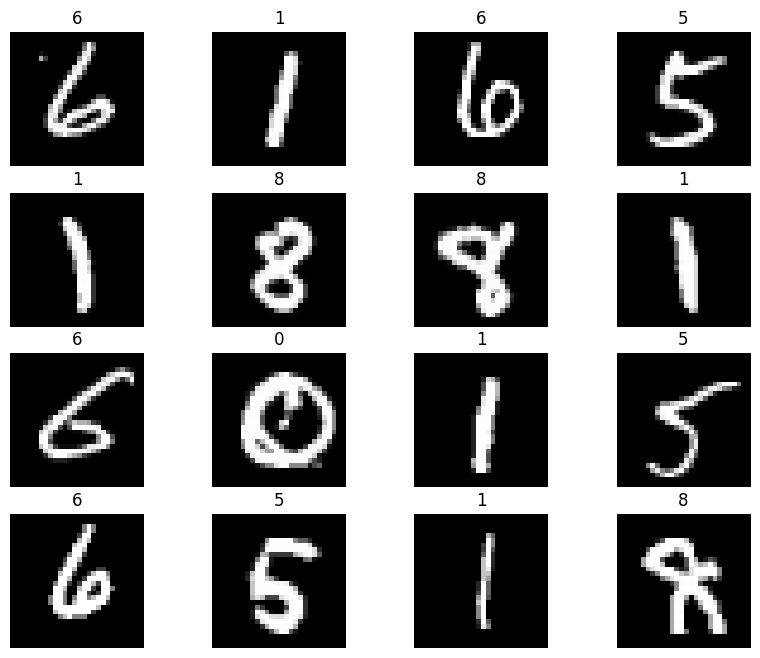

In [29]:
batch = next(iter(train_dataloader))
X_batch, y_batch = batch
import matplotlib.pyplot as plt


figure = plt.figure(figsize=(10, 8))
cols, rows = 4, 4
for i in range(cols * rows):
    img, label = X_batch[i], y_batch[i]
    figure.add_subplot(rows, cols, i+1)
    plt.title(label.item())
    plt.axis("off")
    plt.imshow(img.reshape(-1, 28, 28).squeeze(), cmap="gray")
plt.show()

Now that we have our data ready, let's reiterate our PyTorch model blueprint:

The most basic blueprint of PyTorch model training consists of
- Get your data
- Wrap your data splits in a [data loader](https://pytorch.org/docs/stable/data.html)
- Instantiate the model
- Instantiate a [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions)
- Instantiate an [optimizer object](https://pytorch.org/docs/stable/optim.html), to which you pass the parameters you want to optimize
- Iterate through your training data, for every batch:
    - reset the gradients
    - do forward pass
    - compute loss
    - backward pass
    - update parameters

(Optionally):
- After every full iteration through all training data samples (called an epoch), loop through all batches of validation data:
    - forward pass
    - compute loss and validation scores


In one of the previous exercises, we already implemented a model compatible with MNIST: 784 input features and 10 output nodes (one for each class). Hence, we can move on to loss function and optimizers. For multi-class classification of the digits, we will need to use the [Cross Entropy Loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss). Take a look at what kind of inputs this loss function expects. According to the documentation: `The input is expected to contain raw, unnormalized scores for each class.` Meaning that we can pass logits directly to this loss function, and we do not have to apply a softmax operation ourselves.

For optimizer choice, we can choose [vanilla gradient descent](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD) or the nowadays-industry-standard [Adam optimizer](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam), which is itself a pimped version of stochastic gradient descent (with momentum).

Take note that we can also specify our desired learning rate in our model. This learning should almost always be tuned as it will influence how fast our model trains but also convergence.

In [30]:
model = HyperparameterModel(dimensions_from_input_to_output= [784, 128, 10]) # your model from previous exercises here.

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.005) # SGD = stochastic gradient descent

Now we're ready to perform training. We'll build up the training loop step-wise in the following codeblocks. Let's first start with passing one batch to the model, computing the loss, performing backpropagation and updating the weights:

In [31]:
batch = next(iter(train_dataloader))
X_batch, y_batch = batch

y_hat_batch = model(X_batch)

loss = loss_function(y_hat_batch, y_batch) # Compute loss

loss.backward()   # Calculate gradients
optimizer.step()   # Update weights using defined optimizer

print(X_batch.shape, y_batch.shape)
print(y_hat_batch.shape)
print("Outputs as logits, first two samples:")
print(y_hat_batch[:2])
print('loss:', loss)

torch.Size([16, 784]) torch.Size([16])
torch.Size([16, 10])
Outputs as logits, first two samples:
tensor([[-0.1328, -0.0647,  0.0506,  0.1118,  0.1160, -0.0435,  0.0409,  0.0012,
          0.0417,  0.0255],
        [ 0.0131, -0.1413,  0.0839,  0.1980,  0.1127,  0.0032, -0.0060,  0.1082,
          0.0107, -0.1266]], grad_fn=<SliceBackward0>)
loss: tensor(2.3149, grad_fn=<NllLossBackward0>)


Everytime we perform a training step, we should reset the gradients so that the gradients computed on the previous batch do not influence the next. We can do this by calling `.zero_grad()` on our optimizer. In practice, it is most safe to call this before every forward pass. So if we train a complete epoch:

In [32]:
all_losses = []

for batch in train_dataloader:
    optimizer.zero_grad()
    X_batch, y_batch = batch

    y_hat_batch = model(X_batch)

    loss = loss_function(y_hat_batch, y_batch) # Compute loss

    loss.backward()   # Calculate gradients
    optimizer.step()   # Update weights using defined optimizer

    all_losses.append(loss.item())

Plotting the loss function of every batch during one epoch:

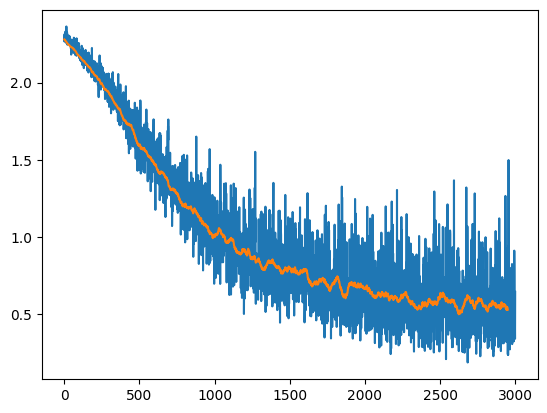

In [33]:
plt.plot(np.arange(len(all_losses)), all_losses)
smoothed_losses = np.convolve(all_losses, np.ones(50)/50, mode = "valid")
plt.plot(np.arange(len(smoothed_losses)), smoothed_losses)

We have evaluated the training progress during one epoch on our training set. What if we want to see the performance of the validation set during training, so that we can see if/when the model starts overfitting? It is common practice to perform a pass through the whole validation set after every training epoch. However, we should not compute gradients now, we can block automatic gradient computation using `torch.no_grad()`. Also, we need to tell PyTorch to put our model in evaluation mode (so it does not perform dropout anymore, etc...). After the validation epoch, we should put the model back to training mode again. The code should look something like this:

In [34]:
predictions = []
true_labels = []
losses = []

model.eval()
with torch.no_grad():
    for batch in val_dataloader:
        X_batch, y_batch = batch

        y_hat_batch = model(X_batch)

        loss = loss_function(y_hat_batch, y_batch)

        losses.append(loss.item())
        predictions.append(y_hat_batch)
        true_labels.append(y_batch)

model.train()

predictions = torch.cat(predictions)
true_labels = torch.cat(true_labels)
accuracy = (true_labels == predictions.argmax(-1)).sum().item() / len(predictions)

print(accuracy)
print(np.mean(losses))

0.871
0.4920853281021118


<div class="alert alert-success">

<b>EXERCISE:</b>
<p> Using the code above, put it all together to train a model for multiple epochs. After every epoch, print or save some training and validation statistics.

Monitor how good your model is training. What things could you change? In particular, try the Adam optimizer or try using gradient descent with the momentum argument. How does this influence training speed? What is it doing? Try tweaking the learning rate.

You should be able to obtain an accuracy of +- 96% </p>

</div>

In [35]:
N_EPOCHS = 20

model = HyperparameterModel(dimensions_from_input_to_output= [784, 128, 10]) # your model from previous exercises here.

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.005) # SGD = stochastic gradient descent

for i in range(1, N_EPOCHS + 1):
    all_losses = []
    model.train()
    for batch in train_dataloader:
        optimizer.zero_grad()
        X_batch, y_batch = batch

        y_hat_batch = model(X_batch)

        loss = loss_function(y_hat_batch, y_batch) # Compute loss

        loss.backward()   # Calculate gradients
        optimizer.step()   # Update weights using defined optimizer

        all_losses.append(loss.item())
    train_loss = np.mean(all_losses)

    predictions = []
    true_labels = []
    losses = []

    with torch.no_grad():
        model.eval()
        for batch in val_dataloader:
            X_batch, y_batch = batch

            y_hat_batch = model(X_batch)

            loss = loss_function(y_hat_batch, y_batch)

            losses.append(loss.item())
            predictions.append(y_hat_batch)
            true_labels.append(y_batch)

    predictions = torch.cat(predictions)
    true_labels = torch.cat(true_labels)
    accuracy = (true_labels == predictions.argmax(-1)).sum().item() / len(predictions)

    print(i, '\t', train_loss, np.mean(losses), accuracy)

1 	 1.001202443132798 0.47798031544685365 0.8776666666666667
2 	 0.4518076544155677 0.37142287387450534 0.8948333333333334
3 	 0.37896575133750837 0.33020565890769166 0.9055
4 	 0.3388432451232026 0.3026595840106408 0.9133333333333333
5 	 0.31158901465994615 0.28062000317374863 0.9184166666666667
6 	 0.2896704035823544 0.2623745523815354 0.9231666666666667
7 	 0.270713282543545 0.24745527215053637 0.92775
8 	 0.25367304830998183 0.23223630795503655 0.932
9 	 0.24241909372154624 0.22027610623588165 0.9360833333333334
10 	 0.22920388256385923 0.20970360783984263 0.9394166666666667
11 	 0.21663853277079761 0.1995219090891381 0.9430833333333334
12 	 0.20829957269721974 0.19111408785233894 0.9456666666666667
13 	 0.19846835617845257 0.1829114388593783 0.94675
14 	 0.18875744791406518 0.17568986676136653 0.9496666666666667
15 	 0.18262228292878718 0.17007146156579256 0.9501666666666667
16 	 0.17592363966597865 0.16375015166153511 0.9528333333333333
17 	 0.1688291566002493 0.15948235282550255

<div class="alert alert-success">

<b>EXERCISE:</b>
<p> After training, what is your performance on the test dataset? </p>

</div>

In [36]:
### YOUR CODE HERE ###
predictions = []
true_labels = []
losses = []

with torch.no_grad():
    model.eval()
    for batch in test_dataloader:
        X_batch, y_batch = batch

        y_hat_batch = model(X_batch)

        loss = loss_function(y_hat_batch, y_batch)

        losses.append(loss.item())
        predictions.append(y_hat_batch)
        true_labels.append(y_batch)

predictions = torch.cat(predictions)
true_labels = torch.cat(true_labels)
accuracy = (true_labels == predictions.argmax(-1)).sum().item() / len(predictions)

print(accuracy)
######################

0.9587


### Extra: Using GPUs

Matrix multiplication run orders of magnitude faster on GPU hardware. If you have a local GPU and have installed a PyTorch version with GPU, you should be able to run this code locally. Otherwise, In Google Colab, you can request access to a GPU via `Runtime > Change runtime type > Hardware accelerator = GPU`.

Briefly, the steps needed to train on GPUs consist of
1. Putting your model on the GPU
2. During your training loop, putting every batch on the GPU before the forward pass
3. If you have a validation loop, doing the same there for every batch.
4. If you have variables that you will use after training (e.g. predictions on the validation set), remember to return this back to the CPU, as GPUs have limited memory.

In PyTorch, we put variables and models on the GPU by specifying their 'device' to be 'cuda' (the parallel computing platform for nvidia GPUs that PyTorch uses).

The following code illustrates how to train your models on GPU hardware:


In [37]:
X, y = next(iter(train_dataloader))

model = model.to('cuda')
print(X.device)
X = X.to('cuda')
print(X.device)

y_hat = model(X)

y_hat

cpu
cuda:0


tensor([[-5.8605e+00,  7.1771e+00, -2.8908e+00,  2.7085e-01, -6.9395e-01,
          1.0662e+00, -3.0337e-01, -2.1449e+00,  1.9390e+00,  1.4792e+00],
        [ 1.0761e+01, -8.2330e+00,  2.5924e+00,  7.3095e-01, -4.0953e+00,
          2.9895e-01,  1.2570e+00, -2.5134e+00,  1.0250e+00,  7.0569e-01],
        [-1.0178e+00, -3.1298e+00, -2.8446e+00,  8.7916e-01, -1.2813e+00,
          8.8738e+00,  2.2486e+00, -5.3617e+00,  1.2921e+00,  1.4442e+00],
        [-1.4332e+00, -5.9380e+00,  1.2547e+00, -2.1027e+00,  2.8563e+00,
         -1.1306e+00, -3.0561e-01, -2.1816e+00,  8.3376e+00,  2.7664e+00],
        [-2.8960e+00, -2.3157e+00,  8.0998e-01, -2.0106e+00,  4.1050e+00,
         -7.4575e-01,  4.1972e+00, -5.7393e-01, -2.2836e+00,  1.5733e+00],
        [-4.3873e+00, -3.9544e+00, -5.2587e+00,  2.6787e+00,  4.2927e+00,
         -1.5323e+00, -8.4186e+00,  4.6251e+00,  1.2240e+00,  1.2263e+01],
        [-1.4298e+00, -5.3167e+00,  1.6066e+00, -3.2514e+00,  8.4514e+00,
          4.5371e-01,  1.7313e+0

We encourage you to try out training on GPUs during the next PC lab(s)